#### Explore some edge detection algorithms

In [462]:
# imports libraries
import os
import sys
import imp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import pandas as pd
from __future__ import division

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))

In [463]:
import features
imp.reload(features)

<module 'features' from '../pythonCode/features.py'>

In [464]:
import ipywidgets as widgets
from IPython.html.widgets import interactive
from IPython.display import display

In [465]:
# specifying the path to the audio files
rawDataPath = os.path.join(os.pardir,'rawAudio')

In [466]:
# Select individual 
bent_selector = widgets.Dropdown(
    options=['B1', 'B2','B3'],
    value='B1',
    description='Select the bent number:',
)
pos_selector = widgets.Dropdown(
    options=['NL', 'NU','SL','SU'],
    value='NL',
    description='Select the location on the bent:',
)
motion_selector = widgets.Dropdown(
    options=list(map(str,list(np.arange(20)))),
    value = '18',
    description='Select the motion number:',
)

In [467]:
display(bent_selector)
display(pos_selector)
display(motion_selector)

In [468]:
filename = 'GP_'+bent_selector.value+'_'+pos_selector.value+'_'+motion_selector.value+'.wav'

In [469]:
full_filename = os.path.join(rawDataPath,filename)
ts = wavfile.read(full_filename)[1][:,0]

415
0


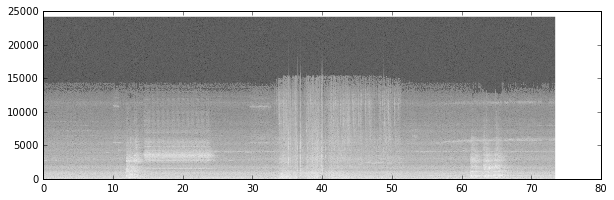

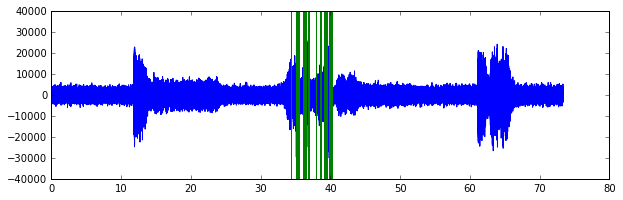

In [470]:
type_selector = widgets.Dropdown(
    options=['Sobel', 'Canny'],
    value='Sobel',
    description='Select the edge detector:',
)


def wrapper(edge_type = 'Sobel',smoothing=1):
    r = features.edges2fractures(ts,edge_type = edge_type, smoothing=smoothing)
    #return(r)

smoothing_slider = widgets.IntSlider(description = 'Smoothing level', min=0, max=20, step=2, value=1)

w2 = widgets.interactive(wrapper,edge_type = type_selector, smoothing=smoothing_slider)
display(w2)